<a href="https://colab.research.google.com/github/alexandrufalk/tensorflow/blob/Master/Range_Doppler_Map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

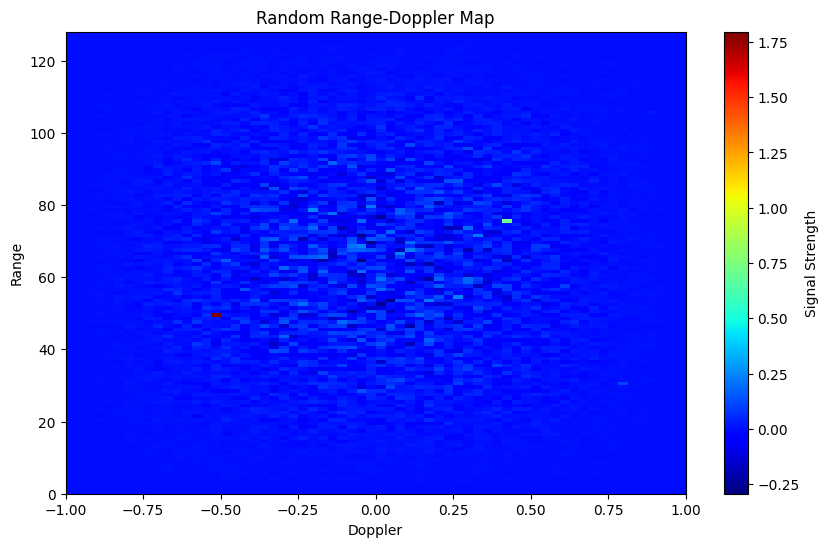

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
num_range_bins = 128    # Number of range bins (distance resolution)
num_doppler_bins = 64   # Number of Doppler bins (velocity resolution)
num_targets = 5         # Number of random targets to simulate
noise_level = 0.1       # Noise amplitude (adjust as needed)

# Initialize Range-Doppler Map with noise
rd_map = noise_level * np.random.randn(num_range_bins, num_doppler_bins)

# Add random targets
for _ in range(num_targets):
    # Randomly choose range and Doppler indices
    range_idx = np.random.randint(0, num_range_bins)
    doppler_idx = np.random.randint(0, num_doppler_bins)

    # Assign a random signal strength for the target
    target_strength = np.random.uniform(1, 5)  # Adjust range as needed

    # Add the target to the RDM
    rd_map[range_idx, doppler_idx] += target_strength

# Apply window functions to reduce sidelobes (optional)
range_window = np.hanning(num_range_bins)
doppler_window = np.hanning(num_doppler_bins)
window_2d = np.outer(range_window, doppler_window)
rd_map *= window_2d

# Plot the Range-Doppler Map
plt.figure(figsize=(10, 6))
plt.imshow(rd_map, aspect='auto', extent=[-1, 1, 0, num_range_bins], cmap='jet')
plt.title('Random Range-Doppler Map')
plt.xlabel('Doppler')
plt.ylabel('Range')
plt.colorbar(label='Signal Strength')
plt.show()
